In [1]:
from mflex.load.read_file import read_fits_soar, read_issi_analytical, read_issi_rmhd
from mflex.model.field.bfield_model import magnetic_field, bz_partial_derivatives
import numpy as np
import matplotlib.pyplot as plt
from mflex.model.plasma_parameters import deltapres, deltaden
from mflex.plot.plot_magnetogram import plot_fieldlines_grid
from mflex.plot.plot_plasma_parameters import plot_deltaparam
from datetime import datetime
import cProfile
import pstats
import matplotlib.pyplot as plt
from mflex.model.plasma_parameters import (
    bpressure,
    bdensity,
    btemp,
    deltapres,
    deltaden,
    pres,
    den,
)
from datetime import datetime

In [4]:
z0 = 0.2
xmin = 0.0
ymin = 0.0
zmin = 0.0
xmax = 1.0
ymax = 1.0
zmax = 1.0

a = 0.0
alpha = 0.0
b = 1.0

deltaz = z0 / 10.0

z0_b = z0
deltaz_b = deltaz
nresol_x = 100
nresol_y = 100
nresol_z = 100
t_photosphere = 5600.0
t_corona = 2.0 * 10.0**6
t0 = (t_photosphere + t_corona * np.tanh(z0 / deltaz)) / (1.0 + np.tanh(z0 / deltaz))
t1 = (t_corona - t_photosphere) / (1.0 + np.tanh(z0 / deltaz))
g_solar = 274.0
mbar = 1.0  # Mean molecular weight
h = (
    1.3807 * t0 / (mbar * 1.6726 * g_solar) * 0.001
)  # presure scale height = kB * t0 / (mbar*g) in units of 10^4
rho0 = 3.0**-4  # plasma density at z = 0
# b0 = 100.0  # 500 Gauss background magnetic field strength
b0 = 1.0
p0 = (
    1.3807 * t_photosphere * rho0 / (mbar * 1.6726) * 1.0 * 10**4
)  # Ideal gas law fulfilled on photosphere
pB0 = 3.9789 * 10**-3 * b0**2  # Magnetic pressure on photosphere
beta0 = p0 / pB0
b = 1.0

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

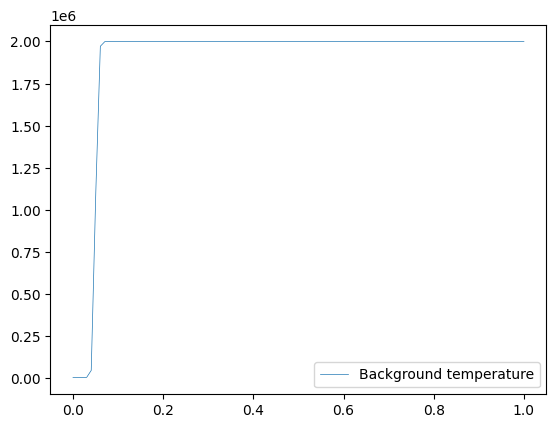

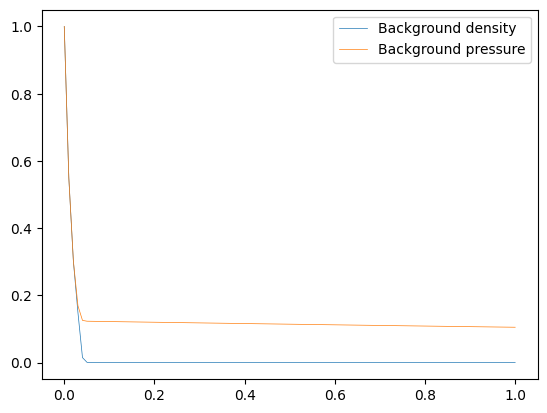

In [5]:
backpres = 0.0 * z_arr
backtemp = 0.0 * z_arr
backden = 0.0 * z_arr

for iz in range(nresol_z):
    z = z_arr[iz]
    backpres[iz] = bpressure(z, z0, deltaz, h, t0, t1)
    backden[iz] = bdensity(z, z0, deltaz, h, t0, t1)
    backtemp[iz] = btemp(z, z0, deltaz, t0, t1)
plt.plot(z_arr, backtemp, label="Background temperature", linewidth=0.5)
plt.legend()
plt.show()
plt.plot(z_arr, backden, label="Background density", linewidth=0.5)
plt.plot(z_arr, backpres, label="Background pressure", linewidth=0.5)
plt.legend()
plt.show()